In [1]:
# This script is extremely important to understand so please go through all the cells in 
# which descriptions have been provided..!!!

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

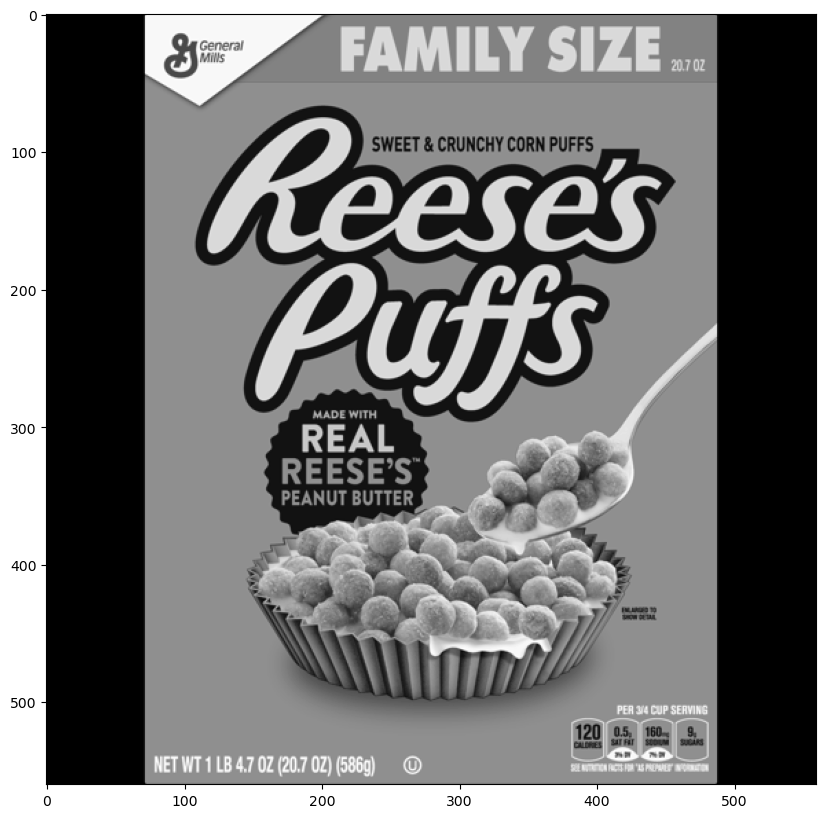

In [3]:
############# PART 1 ###############
##### ORB MATCHER

# Main image

reeses = cv2.imread('DATA/reeses_puffs.png',0)
display(reeses)

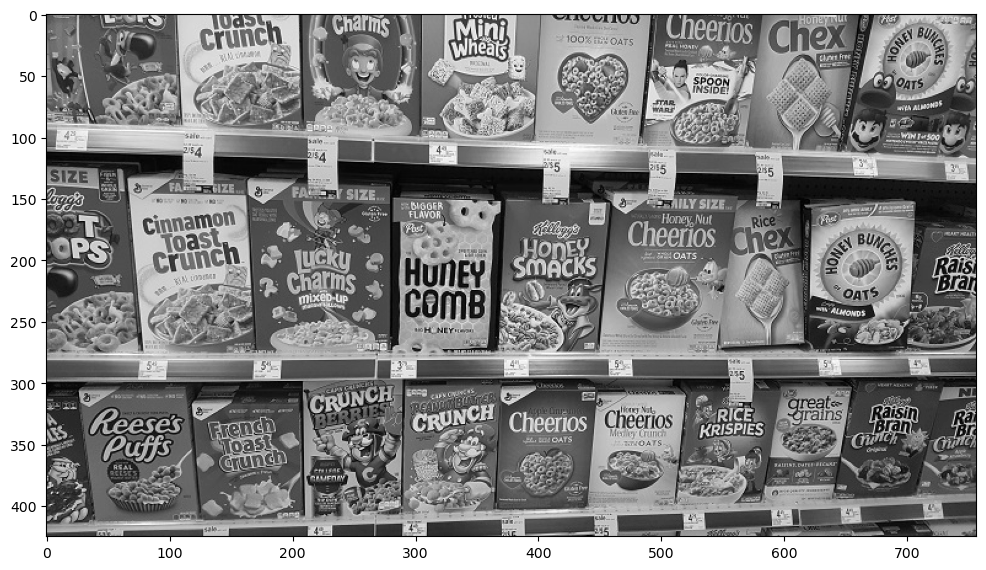

In [4]:
# Targate image

cereals = cv2.imread('DATA/many_cereals.jpg',0)
display(cereals)

In [5]:
# BruteForce Detection with orb descriptors 
# cv2.BFMatcher

# STEP 1 - we create the detector

orb = cv2.ORB_create() # to create an ORB detector 'Oriented FAST and Rotated BRIEF'

In [6]:
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

# sybtax -- kp1, des1 = orb.detectAndCompute(image, mask)

# kp1 - This variable will store the keypoints detected by ORB in the image.
# Keypoints are the distinctive points in the image, such as corners, edges, or other areas of interest. 
# These points are identified as locations that stand out from their surroundings and can be reliably 
# tracked or matched across different images.

# des (descriptors) = This variable will store the descriptors associated with the keypoints.
# Descriptors are essentially a way of describing the region around each keypoint in a compact form. 
# They are used to match keypoints between different images. ORB computes these descriptors, 
# which can later be used for tasks like image matching or object recognition.

# orb.detectAndCompute(): this method detects keypoints in the image and computes descriptors in one go.

In [7]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True) # setting up the brute force matcher 

# syntax -- bf = cv2.BFMatcher(normType, crossCheck)

# cv2.BFMatcher - this is the function that creates a Brute-Force Matcher object. 
# The Brute-Force Matcher works by taking one descriptor from the first set and matching it with the 
# descriptor from the second set that is closest (based on a specified distance metric).

# cv2.NORM_HAMMING: This is the distance metric to be used for matching.
# It counts the number of differing bits between two binary strings.

# crossCheck=True: This is an optional parameter that, when set to True, enables cross-checking 
# during the matching process.
# CrossCheck ensures that a match is considered valid only if the first descriptor matches the 
# second descriptor and vice versa.

In [8]:
matches = bf.match(des1,des2) # initiating matching 

# Each match in this list is an object of the type cv2.DMatch.

# The cv2.DMatch object contains several attributes, and one of the most important is the 
# distance attribute, which represents how similar two descriptors are. The smaller the distance, 
# the more similar the two keypoints are.

In [9]:
matches = sorted(matches,key=lambda x: x.distance) 

# This line of code sorts the list of matches based on their distance attribute.

# the sorted() function is used to return a new list that is sorted based on the provided sorting criteria.
# The sorting criterion here is based on the distance between descriptors.

# The key parameter of the sorted() function allows you to specify a custom sorting criterion.
# In this case, it's a lambda function (lambda x: x.distance), which means that each match x is being 
# sorted based on its distance attribute.

In [10]:
single_match = matches[0]
single_match.distance

42.0

In [11]:
len(matches) # thats a lot of matches to display so lets just take the first 25 matches 

139

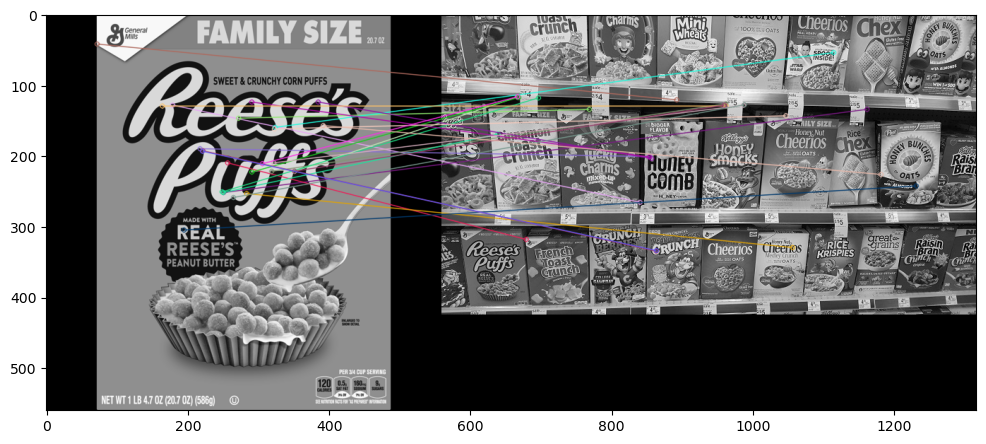

In [12]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_matches)

# flags=2: The flag 2 means that only the matched keypoints will be drawn.
# flags=0: The flag 0 means that both the matched and uncmatched will be drawn 

So this sort of brute force detection with ORB descriptors doesn't always work, especially if your image
doesn't really look like the target image so the image that you're querying. And there's a couple of problems with our image. One is that we have this family size, which isn't even present in the box of the other one. And then the other issue is that it's a little distorted here because it's twisted a little bit and it's on the bottom.

So for these sort of tasks, we're gonna need some more sophisticated methods of feature matching, and we're gonna set up those two much better methods in part two of this lecture series. So coming up next, we're gonna check out brute force matching with SIFT descriptors and the ratio test and the FLANN based matcher, which will be able to detect the match over here on this Reese's Puffs box cereal.

In [13]:
############# PART 2 ###############
##### SIFT DECTECTOR

So now what we're going to do is use SIFT descriptors, S-I-F-T. And SIFT stands for Scale-Invariant Feature Transform. And it does really well when you're dealing with image sizes that are at a different scale.

In [14]:
# STEP 1 - TO DETECT THE DETECTOR

sift = cv2.SIFT_create() # creating the sift detector 

# cv2.SIFT_create(): This is the correct function to create a SIFT object in OpenCV (as of OpenCV 4.x). 
# In older versions, SIFT was part of the xfeatures2d module, but in newer versions, SIFT is included 
# directly in OpenCV, so there’s no need to use cv2.xfeatures2d anymore.

In [15]:
# STEP 2 - to generate keypoints and descriptors 

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)


In [16]:
# STEP 3 - to initiate the brute force matcher

bf = cv2.BFMatcher()

In [17]:
# STEP 4 - to initiate the best matching

matches = bf.knnMatch(des1,des2,k=2) 

# knn - its the k number of best matches 
# k - no of top matches u want like here we want 2



In [18]:
# STEP 5 - creating a empty list to be filled with best matches 

good = []

# LESS DISTANCE == BETTER MATCH 

# RATIO MATCH  < 75% MATCH 2
for match1,match2 in matches:
    # IF MATCH 1 DISTANCE is LESS THAN 75% of MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, LETS KEEP IT!
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [19]:
len(good)

79

In [20]:
len(matches)

1501

In [21]:
# STEP 6 - drawing the matches on the images  

sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0) 

# flags=2: The flag 2 means that only the matched keypoints will be drawn.
# flags=0: The flag 0 means that both the matched and uncmatched will be drawn 

# None (outImg): This is the output image parameter. By specifying None, you are asking OpenCV to 
# create a new output image that will display both input images side by side with lines showing the 
# matches between keypoints. You could provide an image here if you wanted to draw the matches on 
# an existing image.

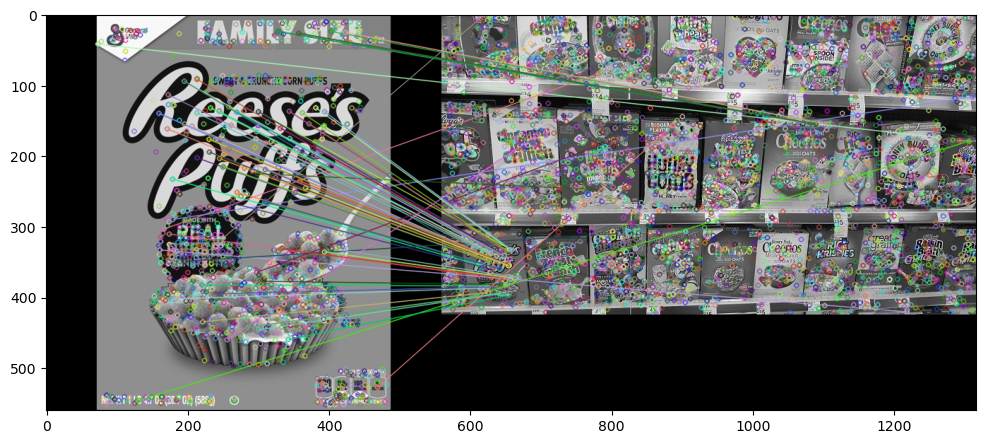

In [22]:
display(sift_matches)

In [23]:
################# PART 3 ###############
##### FLANN MATCHER

# STEP 1 - created the swift detector to be used with FLANN matcher instead of the BFMatcher 

sift = cv2.SIFT_create()

In [24]:
# STEP 2 - generated the  keypoints and descriptors

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [25]:
# STEP 3 - to initiate the algorithm to be used by FLANN matcher for further calculation

# FLANN - fast library for approximate nearest neighbors
# FLANN_INDEX_KDTREE: The algorithm to be used by the FLANN-based matcher. 
# The value 0 indicates the KD-Tree algorithm, which is suitable for SIFT descriptors. 

FLANN_INDEX_KDTREE = 0
index_param = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_param = dict(checks=50)

# index_param: This dictionary contains the algorithm used (FLANN_INDEX_KDTREE) and the number of trees
# (trees=5). More trees can improve accuracy but may slow down the search.

# search_param: This dictionary contains the checks=50 parameter, which controls how many leaf nodes 
# in the KD-tree the matcher should check to find a match. A higher value leads to better matches but 
# may increase search time.

In [26]:
# STEP 4 - initiating the FLANN based matcher 

flann = cv2.FlannBasedMatcher(indexParams=index_param,searchParams=search_param)
matches = flann.knnMatch(des1,des2,k=2) 

# The k=2 means that for each descriptor in des1, it finds the two nearest neighbors in des2

In [27]:
# STEP 5 - Creating a mask in which only good matched will be listed 

matchesMask = [[0,0] for i in range(len(matches))] # creating a mask 

# matchesMask: This is a mask used to filter out "bad" matches. Initially, all entries are [0, 0], 
# meaning no matches are selected.

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
        
### VERY IMPORTANT TO UNDERSTAND

# Ratio Test: For each match, the code applies a ratio test, which is a method introduced by David Lowe
# (SIFT creator) to filter out weak or ambiguous matches. The test checks if the distance of the closest 
# match (match1.distance) is less than 0.7 times the distance of the second-closest match (match2.distance).

# If this condition is met (i.e., the closest match is significantly better than the second-closest), 
# the match is considered a "good" match, and the mask entry is updated to [1, 0], meaning that match1 
# is valid.

In [28]:
# STEP 6 - Creating the draw_param parameters to be used over final draw cv2.drawMatchesKnn..

draw_param = dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=2)

# like the index_param and the search_param,, draw_param is also a dictionary (dict) 
# used basically to 'how to draw' the found parameters on the image 

# matchColor=(0, 255, 0): Matches will be drawn in green 

# singlePointColor=(255, 0, 0): Keypoints that are not matched will be drawn in red.

# matchesMask=matchesMask: The mask created earlier is passed to indicate which matches should be drawn.

# flags=2: The flag 2 means that only the matched keypoints will be drawn.
# flags=0: The flag 0 means that both the matched and uncmatched will be drawn 

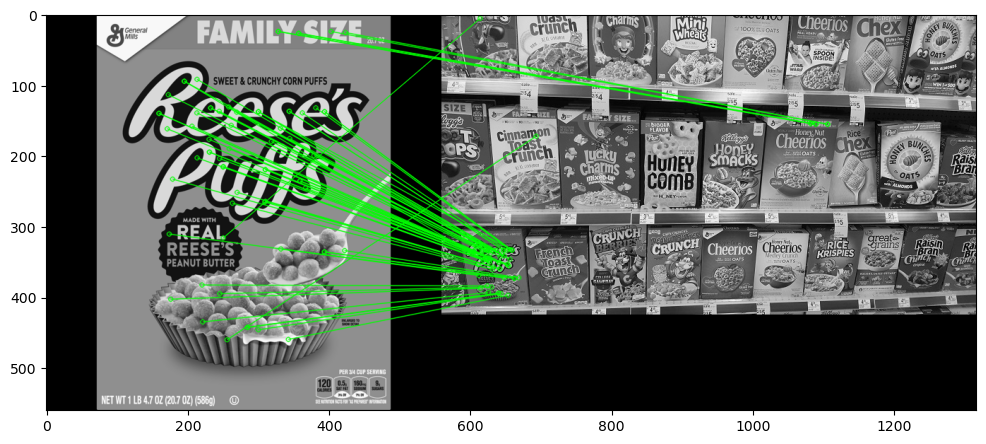

In [29]:
# STEP 7 - Finally APPLYING THE PARAMERTRS SO WE FOUND ON THE IMAGE

# SYNTAX -->
# cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, outImg, matchColor, singlePointColor, matchesMask, flags)

flann_matches =  cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_param)
display(flann_matches)

# None (outImg): This is the output image parameter. By specifying None, you are asking OpenCV to 
# create a new output image that will display both input images side by side with lines showing the 
# matches between keypoints. You could provide an image here if you wanted to draw the matches on an 
# existing image.

# **draw_param (matchColor, singlePointColor, matchesMask, flags):
# This is a parameter unpacking of the draw_param dictionary defined earlier, which contains 
# additional settings for how the matches will be drawn